In [4]:
import yfinance as yf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import datetime

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

import plotly.offline as py
# That's line needed if you use jupyter notebook (.ipynb):
py.init_notebook_mode(connected=True)

import plotly.graph_objects as go

In [4]:
def dataFrame(symbol, period, startdate, enddate):
    
    columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    tickerData = yf.Ticker(symbol)
    tickerDf = tickerData.history(period=period, start=startdate, end=enddate)
    
    return tickerDf[columns]    

In [5]:
today = datetime.date.today()
start = datetime.datetime(today.year-5,today.month,today.day)

In [6]:
today, start

(datetime.date(2020, 3, 27), datetime.datetime(2015, 3, 27, 0, 0))

In [7]:
tickerSymbol = 'GOOG'

In [8]:
df = dataFrame(tickerSymbol, '1d', start, today)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-03-27,551.49,553.76,546.63,546.84,1897400
2015-03-30,550.11,551.95,546.67,550.52,1287500
2015-03-31,548.49,553.19,545.22,546.50,1588000
2015-04-01,547.10,549.63,538.02,541.07,1963000
2015-04-02,539.37,539.37,532.39,534.06,1716300


In [9]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-20,1135.72,1143.99,1065.49,1072.32,3601800
2020-03-23,1061.32,1071.32,1013.54,1056.62,4044100
2020-03-24,1103.77,1135.00,1090.62,1134.46,3344500
2020-03-25,1126.47,1148.90,1086.01,1102.49,4081500
2020-03-26,1111.80,1169.97,1093.53,1161.75,3571700


In [10]:
def plotChart(df):
    plt.figure(figsize=(15,6))
    df['Close'].plot()
    plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Price', fontsize=16)
    
    for year in range(2015,2021):
        plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

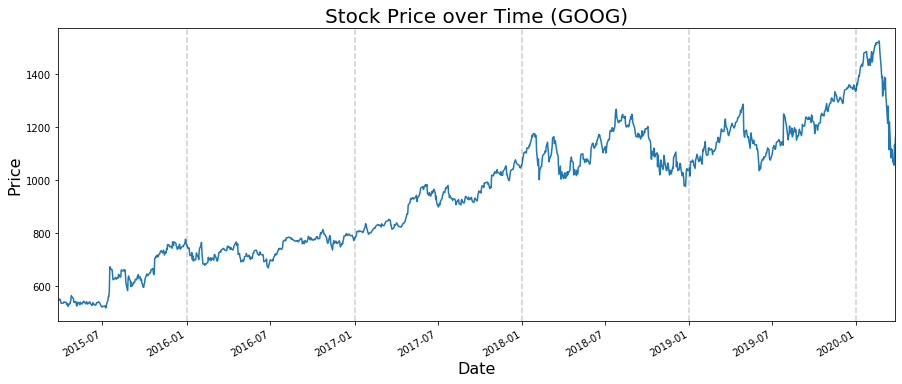

In [11]:
plotChart(df)

In [12]:
# https://towardsdatascience.com/python-stock-analysis-candlestick-chart-with-python-and-plotly-e619143642bb

tickerSymbol = 'NFLX'
today = datetime.date.today()
start = datetime.datetime(today.year-5,today.month,today.day)


def candleStick(symbol, startdate, enddate):
    tickerData = yf.Ticker(symbol)
    df = tickerData.history(period='1d', start=startdate, end=enddate)
    
    fig = go.Figure(data=[go.Candlestick(x=df.index,
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close'])])

    fig.update_layout(
        title= {
            'text': symbol,
          'y':0.9,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
          font=dict(
            family="Times New Roman",
            size=20,
            color="#7f7f7f"
        )
        )

    fig.show()

In [13]:
candleStick(tickerSymbol, start, today)

In [85]:
# https://plotly.com/~jackp/17421/plotly-candlestick-chart-in-python/#/
# Useful for volume bar and moving average
# Not for Plotly 4.x

INCREASING_COLOR = '#17BECF'
DECREASING_COLOR = '#7F7F7F'

colors = []

for i in range(len(df.Close)):
    if i != 0:
        if df.Close[i] > df.Close[i-1]:
            colors.append(INCREASING_COLOR)
        else:
            colors.append(DECREASING_COLOR)
    else:
        colors.append(DECREASING_COLOR)


In [5]:
import numpy as np
import pandas as pd

In [8]:
import plotly
import plotly.graph_objs as go

import json

In [6]:
def create_plot():


    N = 40
    x = np.linspace(0, 1, N)
    y = np.random.randn(N)
    df = pd.DataFrame({'x': x, 'y': y}) # creating a sample dataframe


    data = [
        go.Bar(
            x=df['x'], # assign x as the dataframe column 'x'
            y=df['y']
        )
    ]

    graphJSON = json.dumps(data, cls=plotly.utils.PlotlyJSONEncoder)

    return graphJSON

In [10]:
N = 40
x = np.linspace(0, 1, N)
y = np.random.randn(N)
df = pd.DataFrame({'x': x, 'y': y}) # creating a sample dataframe


data = [
    go.Bar(
        x=df['x'], # assign x as the dataframe column 'x'
        y=df['y']
    )
]

data

[Bar({
     'x': array([0.        , 0.02564103, 0.05128205, 0.07692308, 0.1025641 , 0.12820513,
                 0.15384615, 0.17948718, 0.20512821, 0.23076923, 0.25641026, 0.28205128,
                 0.30769231, 0.33333333, 0.35897436, 0.38461538, 0.41025641, 0.43589744,
                 0.46153846, 0.48717949, 0.51282051, 0.53846154, 0.56410256, 0.58974359,
                 0.61538462, 0.64102564, 0.66666667, 0.69230769, 0.71794872, 0.74358974,
                 0.76923077, 0.79487179, 0.82051282, 0.84615385, 0.87179487, 0.8974359 ,
                 0.92307692, 0.94871795, 0.97435897, 1.        ]),
     'y': array([ 0.29903252,  0.30007739,  0.44539786, -1.50094151,  0.3247126 ,
                 -1.45516459, -0.41155202,  0.12926944, -0.48312275, -1.49689779,
                 -1.7594444 , -1.73094891,  0.92962325, -1.04949185,  0.8906089 ,
                 -1.13709385, -0.08423517, -0.51649078,  0.87525095,  0.0542506 ,
                  0.765405  ,  2.32791414,  0.90419352, -0.32683

In [9]:
create_plot()

'[{"x": [0.0, 0.02564102564102564, 0.05128205128205128, 0.07692307692307693, 0.10256410256410256, 0.1282051282051282, 0.15384615384615385, 0.1794871794871795, 0.20512820512820512, 0.23076923076923075, 0.2564102564102564, 0.28205128205128205, 0.3076923076923077, 0.3333333333333333, 0.358974358974359, 0.3846153846153846, 0.41025641025641024, 0.4358974358974359, 0.4615384615384615, 0.48717948717948717, 0.5128205128205128, 0.5384615384615384, 0.5641025641025641, 0.5897435897435898, 0.6153846153846154, 0.641025641025641, 0.6666666666666666, 0.6923076923076923, 0.717948717948718, 0.7435897435897436, 0.7692307692307692, 0.7948717948717948, 0.8205128205128205, 0.8461538461538461, 0.8717948717948718, 0.8974358974358974, 0.923076923076923, 0.9487179487179487, 0.9743589743589743, 1.0], "y": [0.7203162866428584, 0.7356516119602248, 1.5852208198132405, -1.0240256314975615, -0.18191093040636203, 1.3123914280441014, -0.7362376113675277, -0.5080949266397642, -1.3413791710339413, 0.8746881779482129, -1